In [1]:
from typing import Union
import json
import pandas as pd
import numpy as np
DATASET_PATH = 'classified_data_final_w_worker_hash.json'

/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def read_dataset(path):
    with open(path) as f:
        records = []
        for index, line in enumerate(f):
            line_dict = json.loads(line)
            for annotation in line_dict['ratings']:
                record = {
                    'comment': line_dict['comment'],
                    'id': index,
                    'comment_id': line_dict['comment_id'],
                    'source': line_dict['source']
                }
                record.update(annotation)
                records.append(record)
    return pd.DataFrame(records)

In [3]:
df = read_dataset(DATASET_PATH)
df.head()

,comment,id,comment_id,source,toxic_score,is_profane,is_threat,is_identity_attack,is_insult,is_sexual_harassment,...,toxic_comments_problem,education,age_range,lgbtq_status,political_affilation,is_parent,religion_important,fine_to_see_online,remove_from_online,worker_id
0,Just a matter of time before pick up on this s...,0,1135_1,twitter,0,False,False,False,False,False,...,Rarely a problem,Bachelor's degree in college (4-year),45 - 54,Heterosexual,Conservative,Yes,Very important,This is fine for me to see,This comment should be allowed,24482c451b411b96d2c2880bafbab9884007e000d143c0...
1,Just a matter of time before pick up on this s...,0,1135_1,twitter,0,False,False,False,False,False,...,Frequently a problem,Bachelor's degree in college (4-year),25 - 34,Heterosexual,Liberal,No,Not important,This is fine for me to see,This comment should be allowed,dbc501198ada6725d8e8cc6f0101824f04d4b4b8935059...
2,Just a matter of time before pick up on this s...,0,1135_1,twitter,0,False,False,False,False,False,...,Frequently a problem,Some college but no degree,25 - 34,Heterosexual,Prefer not to say,No,Not important,This is fine for me to see,This comment should be allowed,29a3513367445e0fd3c53d61da1fcbebbf4efc6e0de0b9...
3,Just a matter of time before pick up on this s...,0,1135_1,twitter,0,False,False,False,False,False,...,Occasionally a problem,Bachelor's degree in college (4-year),55 - 64,Heterosexual,Liberal,No,Not important,This is fine for me to see,This comment should be allowed,26523080557217fc3b42c882aecab5863966ccfbe31c3f...
4,Just a matter of time before pick up on this s...,0,1135_1,twitter,0,False,False,False,False,False,...,Very frequently a problem,Bachelor's degree in college (4-year),25 - 34,Heterosexual,Liberal,No,Not important,It depends on the context,This comment should be allowed,aa351a28dee4f23fd6abcbb91f9d663440825c8d7455b7...


In [5]:
df.columns

Index(['comment', 'id', 'comment_id', 'source', 'toxic_score', 'is_profane',
       'is_threat', 'is_identity_attack', 'is_insult', 'is_sexual_harassment',
       'gender', 'gender_other', 'race', 'technology_impact',
       'uses_media_social', 'uses_media_news', 'uses_media_video',
       'uses_media_forums', 'personally_seen_toxic_content',
       'personally_been_target', 'identify_as_transgender',
       'toxic_comments_problem', 'education', 'age_range', 'lgbtq_status',
       'political_affilation', 'is_parent', 'religion_important',
       'fine_to_see_online', 'remove_from_online', 'worker_id'],
      dtype='object')

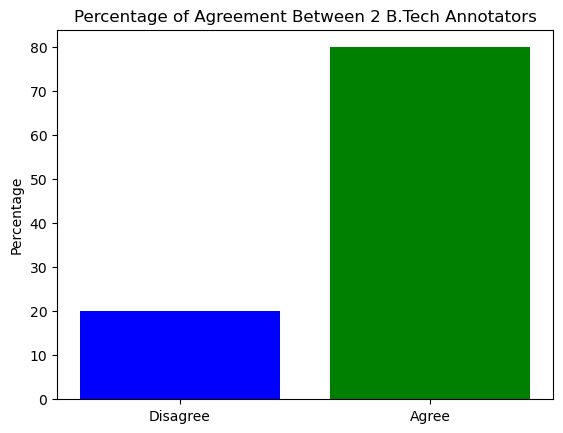

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter annotators with a Bachelor's degree
df_btech = df[df['education'] == "Bachelor's degree in college (4-year)"]

# Select the first two unique annotators
unique_annotators = df_btech['worker_id'].unique()[:2]
ann1, ann2 = unique_annotators

# Filter annotations by these two annotators
annotations_1_btech = df_btech[df_btech['worker_id'] == ann1]
annotations_2_btech = df_btech[df_btech['worker_id'] == ann2]

# Calculate agreement on toxic_score for common comments
hist_list = []
common_comments = set(annotations_1_btech['comment_id']) & set(annotations_2_btech['comment_id'])
for comment_id in common_comments:
    score1 = annotations_1_btech[annotations_1_btech['comment_id'] == comment_id]['toxic_score'].iloc[0]
    score2 = annotations_2_btech[annotations_2_btech['comment_id'] == comment_id]['toxic_score'].iloc[0]
    hist_list.append(abs(score1 - score2) <= 1)

# Plotting
def plot_agg(data):
    counts = [data.count(False), data.count(True)]
    percentages = [count / len(data) * 100 for count in counts]
    labels = ['Disagree', 'Agree']
    plt.bar(labels, percentages, color=['blue', 'green'])
    plt.ylabel('Percentage')
    plt.title("Percentage of Agreement Between 2 B.Tech Annotators")
    plt.show()

plot_agg(hist_list)
